# Linear model

In [417]:
# Imports
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

import numpy as np


device = "cuda" if torch.cuda.is_available() else "cpu"

In [418]:
# Definition of linear regressor
class LinearRegression(nn.Module):
    def __init__(self, input_size):
        super().__init__()

        self.coeficients = nn.Parameter(data=torch.randn((input_size + 1,), requires_grad=True).to(device))
    

    def forward(self, X):
        y = torch.sum(X * self.coeficients[1:], dim=1).to(device)
        y = y + self.coeficients[0]
        return y

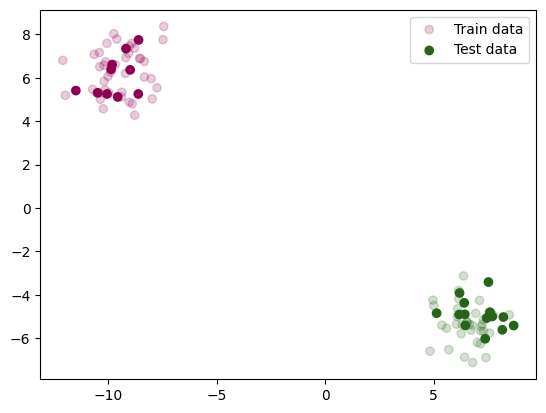

In [419]:
# Generate and visualize data
X, y = make_blobs(100, 2, centers=2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='PiYG', alpha=0.2, label="Train data")
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='PiYG', alpha=1.0, label="Test data")
plt.legend()
plt.show()

In [420]:
# Train model loop
def train_model(X, y, model, epochs, optim, loss_fn):
    X = torch.tensor(X, dtype=torch.float32).to(device)
    y = torch.tensor(y, dtype=torch.float32).to(device)
    for e in range(epochs):
        model.train()
        y_pred = model(X)
        loss = loss_fn(y, y_pred)
        optim.zero_grad()
        loss.backward()
        optim.step()


regressor = LinearRegression(2)
optim = torch.optim.Adam(params=regressor.parameters(), lr=0.1)
loss_fn = nn.MSELoss()
epochs = 100

train_model(X_train, y_train, regressor, epochs, optim, loss_fn)

In [421]:
# Calculate model accuracy
regressor.train()

X_test_gpu = torch.tensor(X_test, dtype=torch.float32).to(device)
y_test_gpu = torch.tensor(y_test, dtype=torch.float32).to(device)

y_pred = regressor(X_test_gpu)
y_pred[y_pred < 0.5] = 0
y_pred[y_pred >= 0.5] = 1

accuracy = torch.count_nonzero(y_pred == y_test_gpu)
print(f"Accuracy: {accuracy / y_test.size * 100}%")

Accuracy: 96.0%


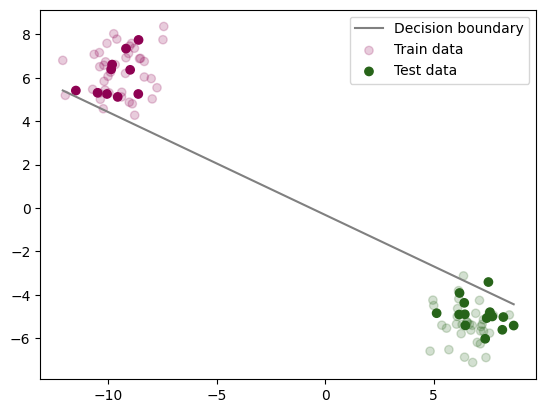

In [422]:
# Plot decision boundary
X_plot = torch.linspace(torch.min(torch.tensor(X[:, 0])), torch.max(torch.tensor(X[:, 0])), 100).to(device)

p = regressor.coeficients
y_plot = -(p[0] - 0.5 + p[1] * X_plot) / p[2]

plt.plot(X_plot.cpu(), y_plot.detach().cpu(), c='gray', label="Decision boundary")
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='PiYG', alpha=0.2, label="Train data")
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='PiYG', alpha=1.0, label="Test data")
plt.legend()
plt.show()